We first create an example dataset for the ``AAclustPlot().centers()`` method, which visualizes cluster 'centers' as obtained by the ``AAclust().comp_centers()`` method:

In [1]:
from sklearn.decomposition import PCA, KernelPCA, FastICA, TruncatedSVD, NMF
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False
# Obtain example scale dataset 
df_scales = aa.load_scales()
X = df_scales.T
# Fit AAclust model retrieve labels to compute centers
aac = aa.AAclust()
labels = aac.fit(X, n_clusters=5).labels_

All data points are visualized in the PCA plot including the cluster centers highlighted by an 'x':

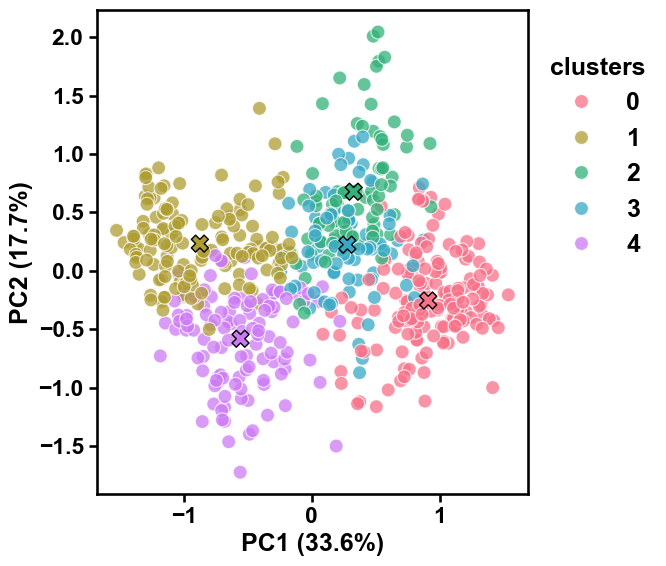

DataFrame shape: (586, 2)


,PC1 (33.6%),PC2 (17.7%)
1,-0.181292,0.579504
2,0.823876,-0.591823
3,0.723627,-0.838029
4,0.860664,-0.746315
5,0.645413,0.481089
6,1.266436,-0.148832
7,-0.753006,0.412799
8,-1.074425,0.348078
9,0.501059,0.261917
10,1.304114,-0.139382


In [2]:
aac_plot = aa.AAclustPlot(model_class=PCA)
aa.plot_settings()
ax, df_components = aac_plot.centers(X, labels=labels)
plt.show()
# DataFrame for respective components are returned
aa.display_df(df_components, n_rows=10, show_shape=True)

Select other PCs using the ``component_x`` and ``component_y`` parameters:

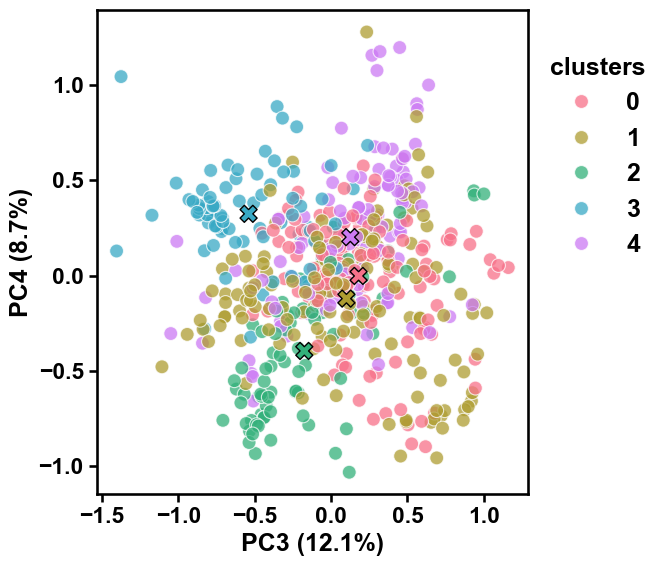

In [3]:
aac_plot.centers(X, labels=labels, component_x=3, component_y=4)
plt.show()

To compare the feature space compression of different Transformer models in a single plot, you can use the ``ax`` and ``legend`` parameters:

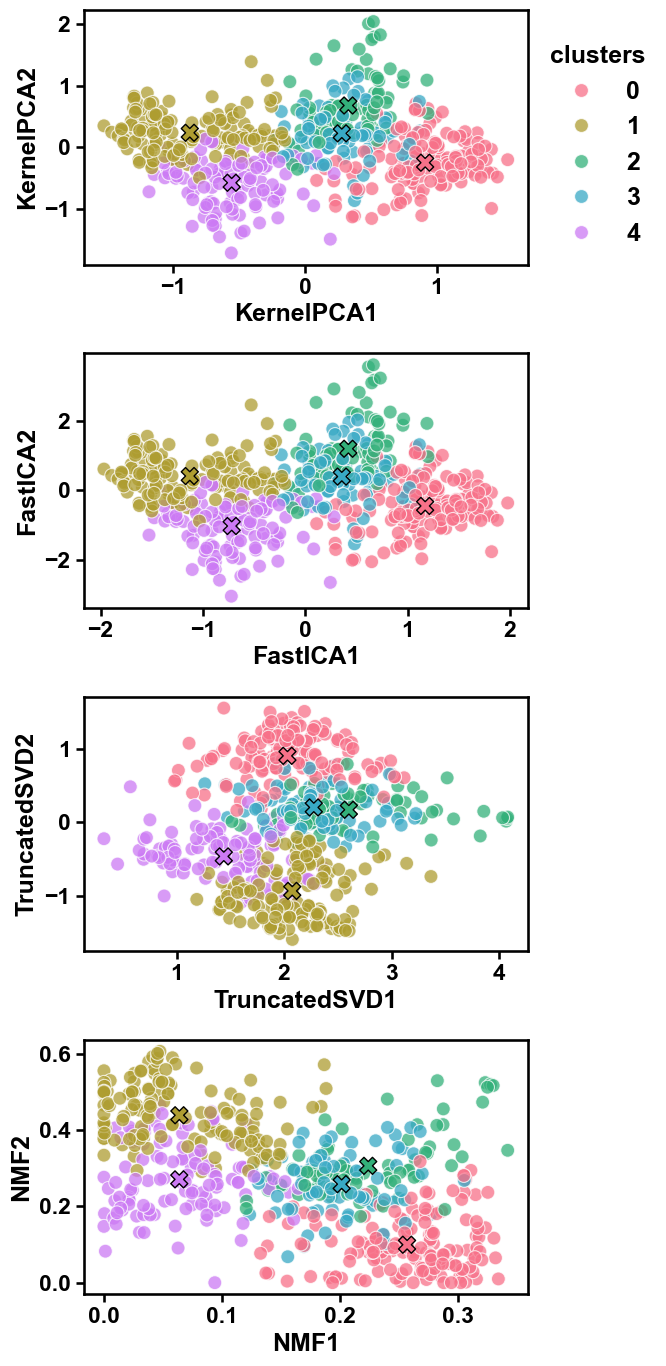

In [4]:
list_models = [KernelPCA, FastICA, TruncatedSVD, NMF]
model_names = ["KernelPCA", "FastICA", "TruncatedSVD", "NMF"]
dict_models = dict(zip(model_names, list_models))
fig, axes = plt.subplots(4, 1, figsize=(7, 14))
for i, model_name in enumerate(dict_models):
    ax = axes[i]
    aac_plot = aa.AAclustPlot(model_class=dict_models[model_name])
    # Set legend only for first subplot
    aac_plot.centers(X, labels=labels, ax=ax, legend=i==0)
plt.tight_layout()
plt.show()
plt.close()
    

Adjust the style of the scatter plot using the ``dot_size`` and ``dot_alpha`` arguments to change the size of the dots and their transparency: 

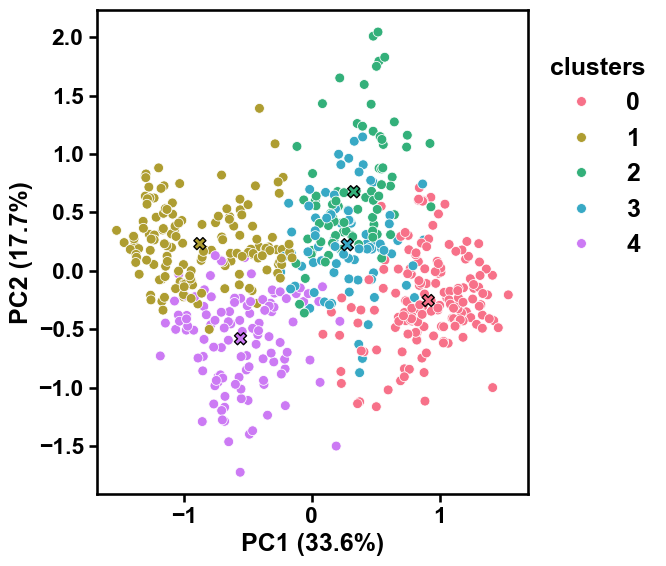

In [5]:
aac_plot = aa.AAclustPlot(model_class=PCA)
aac_plot.centers(X, labels=labels, dot_size=50, dot_alpha=1)
plt.show()

The cluster colors can be adjusted by the ``palette`` argument by providing either a list of colors or a color map: 

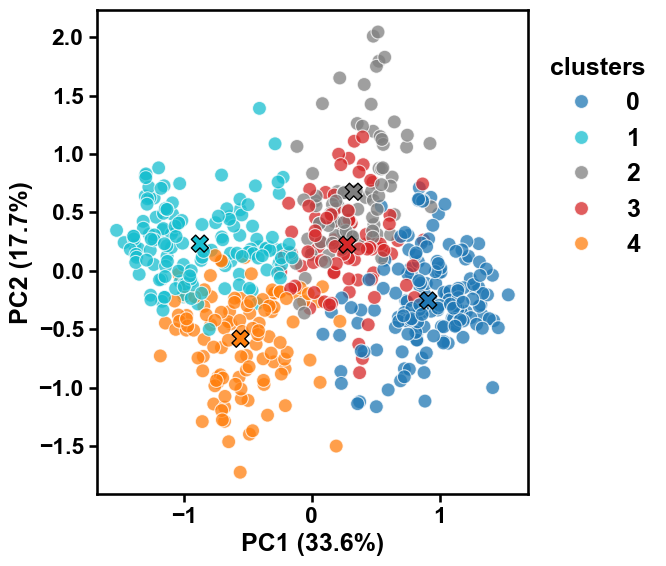

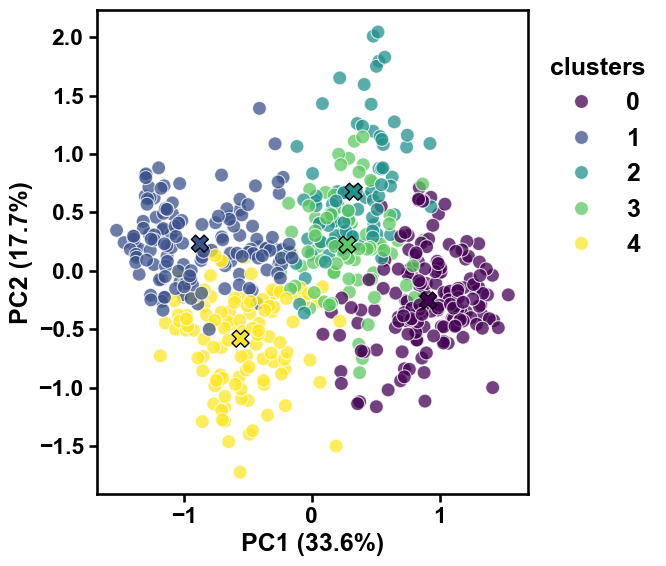

In [6]:
colors = aa.plot_get_clist(n_colors=5)
aac_plot.centers(X, labels=labels, palette=colors)
plt.show()
aac_plot.centers(X, labels=labels, palette="viridis")
plt.show()